## Data Analysis Interview Challenge

### Part 1 ‑ Exploratory data analysis

#### Load packages and file

In [131]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import datetime 
import random
import seaborn as sns
import numpy as np

In [132]:
with open('logins.json') as f:
  df = json.load(f)

In [2]:
df2 =  pd.DataFrame(df['login_time'],columns=['time_stamp'])
df2.head()

,time_stamp
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


#### Reset index and set type to datetime

In [3]:
df2.set_index('time_stamp', inplace=True)
df2.index = pd.to_datetime(df2.index)

#### Aggregate on 15 minutes

In [4]:
df2['count'] = 1
df2.head()
df3 = df2.resample('15T').sum()
df3.head()

,count
time_stamp,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [5]:
print(df3.tail(),'\n')
print((df3.index[-1]-df3.index[0]).days)

                     count
time_stamp                
1970-04-13 17:45:00      5
1970-04-13 18:00:00      5
1970-04-13 18:15:00      2
1970-04-13 18:30:00      7
1970-04-13 18:45:00      6 

101


Plot 15 minutes aggregation

G:\Data\Machine_Learning_Library\learn_others\learn_from_others\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


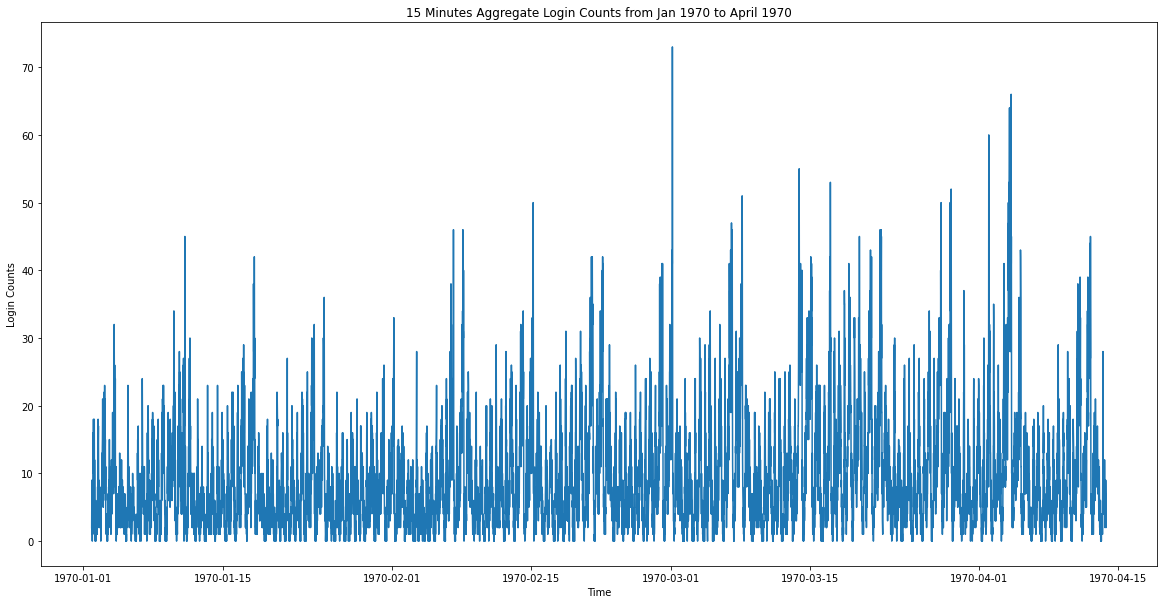

In [6]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
_ = ax.plot(df3.index, df3['count'])
_ = ax.set_xlabel("Time")
_ = ax.set_ylabel("Login Counts")
_ = ax.set_title("15 Minutes Aggregate Login Counts from Jan 1970 to April 1970")

#### Aggregate for 60 minutes, daily, weekly and monthly, then plot again

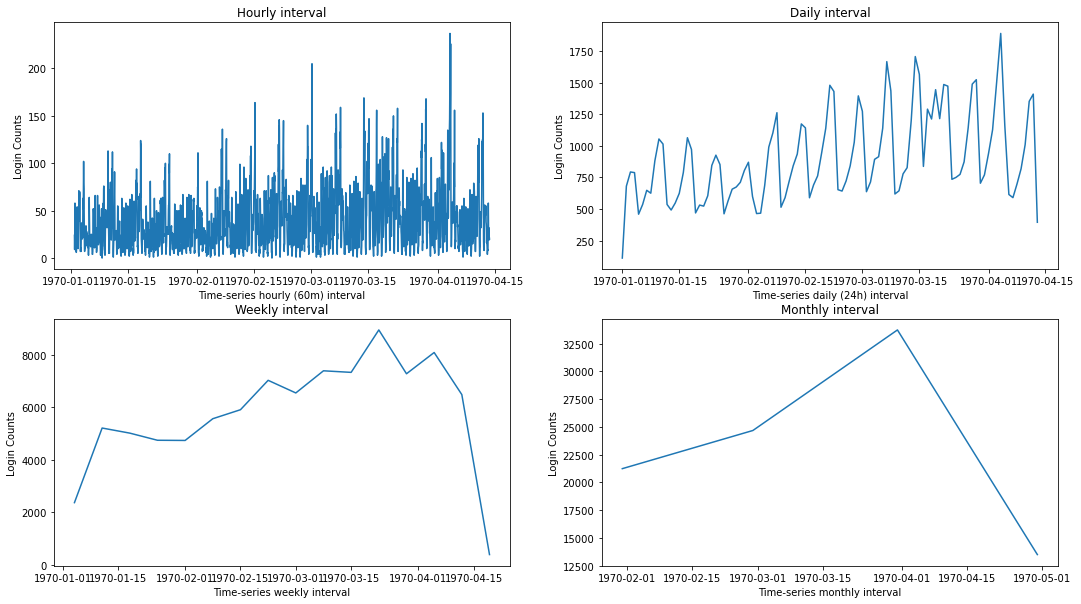

In [7]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(18,10));

# 60-min interval
ax1.plot(df2.resample('60T').sum());
ax1.set(xlabel='Time-series hourly (60m) interval', ylabel='Login Counts', title='Hourly interval');

# Daily interval
ax2.plot(df2.resample('D').sum());
ax2.set(xlabel='Time-series daily (24h) interval', ylabel='Login Counts', title='Daily interval');

# Weekly interval
ax3.plot(df2.resample('W').sum());
ax3.set(xlabel='Time-series weekly interval', ylabel='Login Counts', title='Weekly interval');

# Monthly interval
ax4.plot(df2.resample('M').sum());
ax4.set(xlabel='Time-series monthly interval', ylabel='Login Counts', title='Monthly interval');

#### Observations:
- From 15 mintues, 60 minutes and daily plot, cricle patterns are obviously founded.
- From weekly plot, aggregate login counts were increasing up to the second week of April 1970, then it suddenly plunged.
- Montly plot also confirmed weekly plot.
- To check the daily login counts for each hour, we need to plot a daily login counts for a (or several) specific days.

### Daily plot for random pick 10 days from Jan to April

[4, 6, 11, 13, 34, 48, 52, 68, 71, 98]


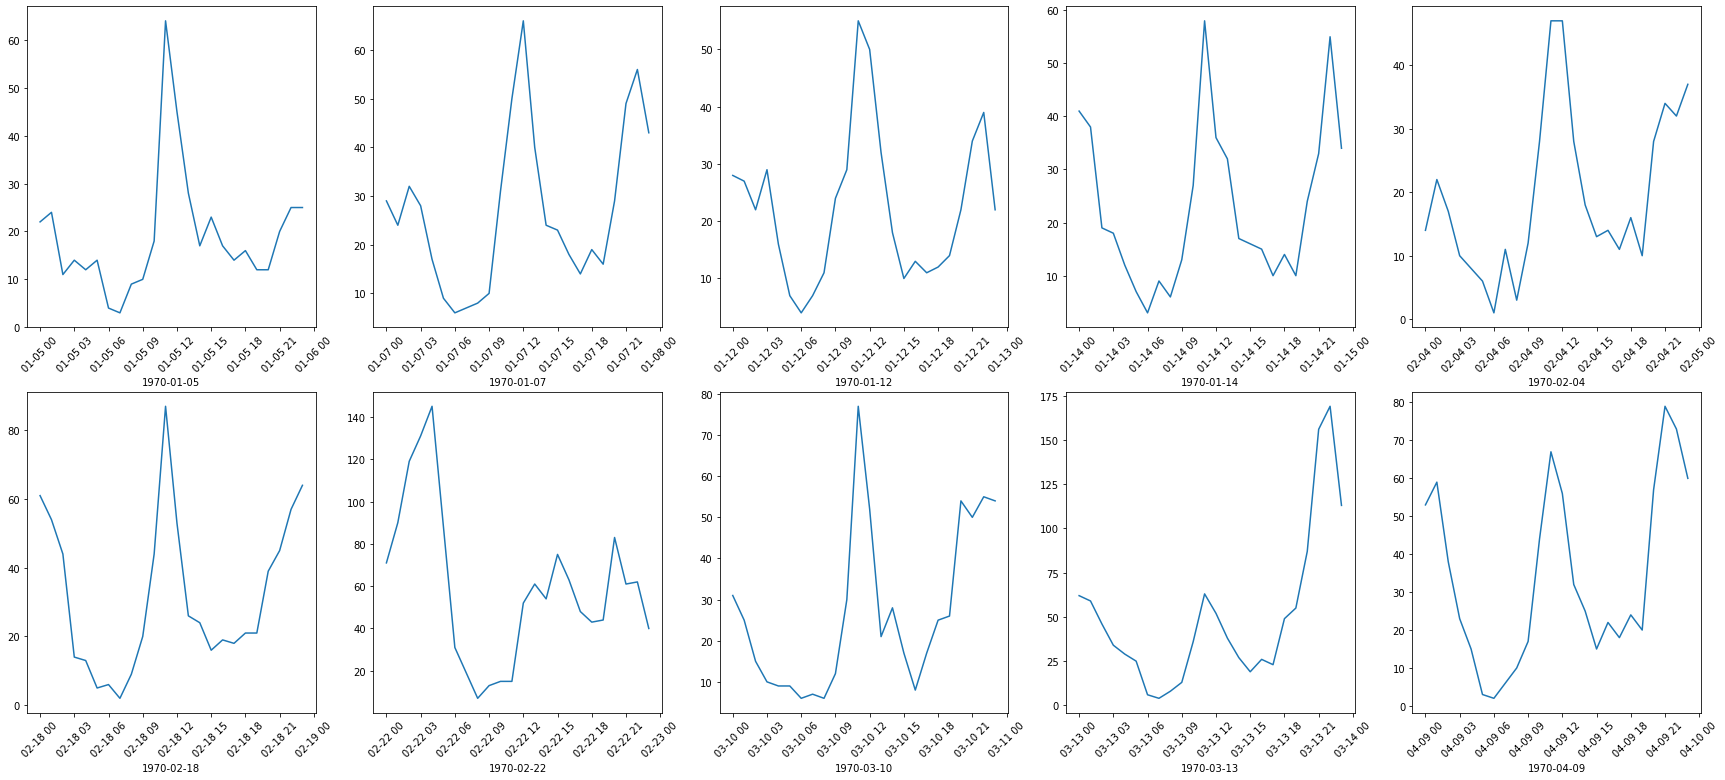

In [8]:
#fig, axs = plt.subplots(2,5, figsize=(15, 6)
df4 = df2.resample('60T').sum()
random.seed(123)
sample_time = sorted(random.sample(range(0,102),k=10))
print(sample_time)
fig, axs = plt.subplots(2,5, figsize = (30,13))
for i in range(10):
    time1 = (datetime.datetime.strptime('1970-01-01', '%Y-%m-%d')+datetime.timedelta(sample_time[i]))
    #time1 = datetime.datetime.strptime(time1, '%Y-%m-%d')
    time1 = datetime.datetime.strftime(time1, '%Y-%m-%d')
    axs[int(np.floor(i/5)),i%5].plot(df4.loc[time1:time1,'count'])
    axs[int(np.floor(i/5)),i%5].tick_params(axis='x', rotation=45)
    axs[int(np.floor(i/5)),i%5].set_xlabel(time1)
    #axs[i] = df4.loc[time1:time1,'count'].plot(linewidth=0.5);

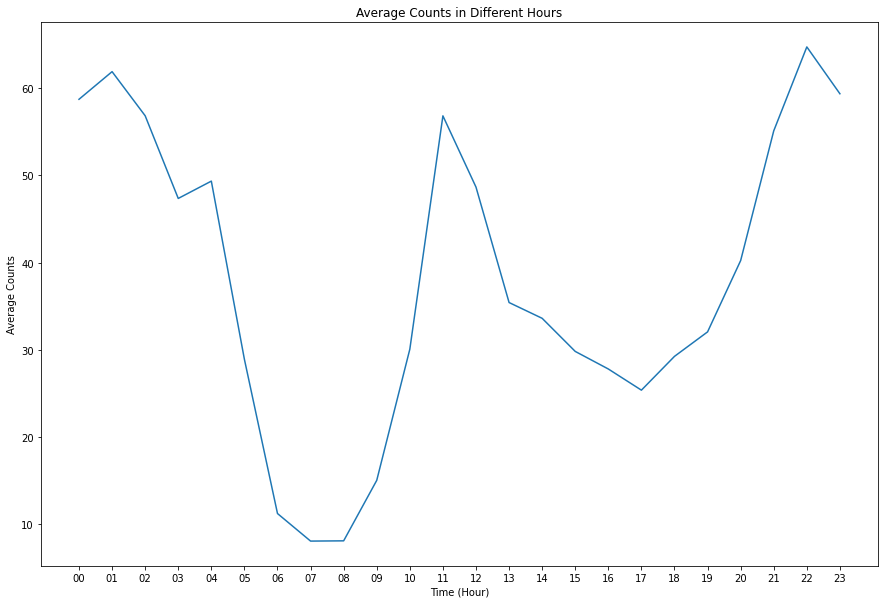

In [9]:
df4['hours']=df4.index.strftime('%H')
df4.head()
df4_pivot = df4.pivot_table(index=df4.index,columns='hours',values='count',aggfunc='sum')
df4_pivot.head()

fig = plt.figure(figsize=(15,10))
_ = plt.plot(df4_pivot.mean())
_ = plt.xlabel('Time (Hour)')
_ = plt.ylabel("Average Counts")
_ = plt.title("Average Counts in Different Hours")

#### Weekly Plot 

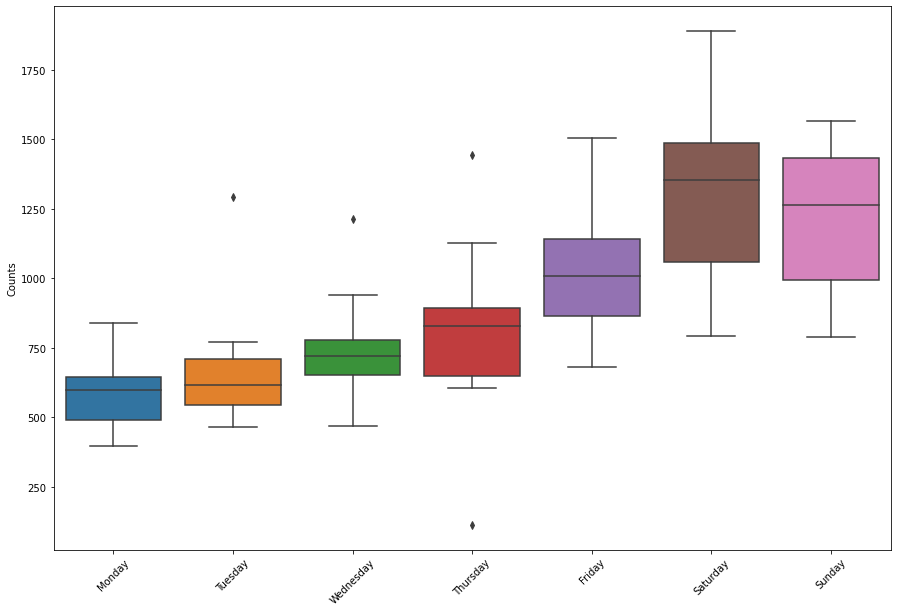

In [10]:
weekdays=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
df5 = df3.resample('D').sum()
df5['weekday'] = df5.index.strftime('%A')
#print(df3.head())
df5_pivot= df5.pivot_table(index=df5.index,columns='weekday',values='count',aggfunc='sum')
#print(df5_pivot.head(10))

#df_day = df5.groupby(df5.index.weekday_name).mean()
fig = plt.figure(figsize=(15,10))
df5_ = pd.DataFrame()
#print(df_day)
for d in weekdays:
    df5_[d] = df5_pivot[d]
_ = sns.boxplot(data=df5_)
_ = plt.xticks(rotation=45)
_ = plt.ylabel('Counts')

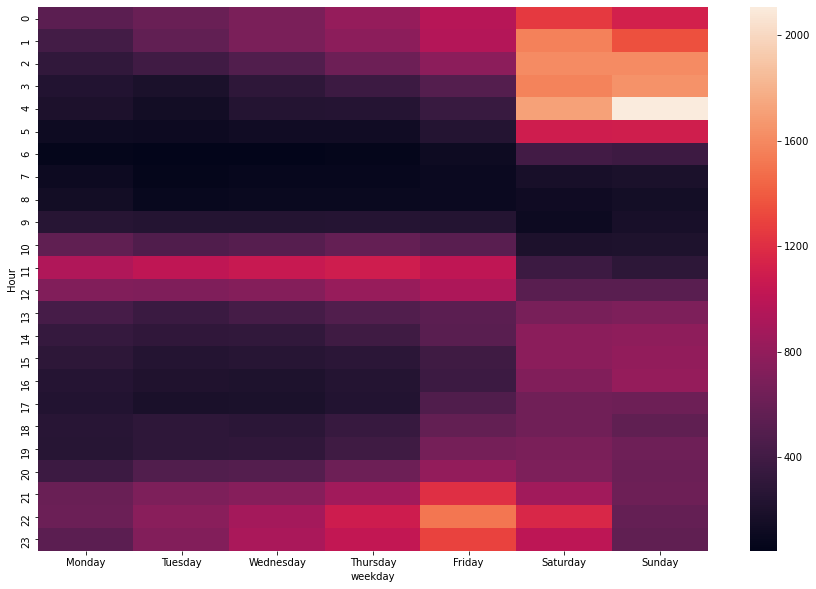

In [11]:
df6 = df3.resample('H').sum()
df6['weekday'] = df6.index.strftime('%A')
#print(df6.head())
df6_ = df6.pivot_table(index=df6.index.hour,columns='weekday',values='count',aggfunc='sum')
df6_=df6_[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]
fig = plt.figure(figsize=(15,10))
_ = sns.heatmap(df6_)
_ = plt.ylabel('Hour')

### Conclustion:
- Pattern of most of plot: around 3:00am-6:00am first lowest accounts period , then counts jump,  around 12:00pm noon, highest counts, then drop, 15:00pm-18:00pm another lowest counts period, then jump again.
- One outliner (plot) highest counts around 3:00 am, another outlier (plot) highest counts around 10:00 pm.
- The average counts in different hours are the same as pattern of most of plot.
- There are more counts in weekends than in weekday.
- More counts in early (0:00am-3:00am) Saturday and Sunday.

### Part 2 ‑ Experiment and metrics design

#### The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities. However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

**Q: What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?**

Metric: Number of times the driver partners serve across the bridge before and after the reimbursement the toll costs since this indicates what will be the effect of the reimbursement on the useage of the bridge.

Possible results of number of times across the bridge:
- (1) Significantly increase 
- (2) No big difference 
- (3) Decrease

The significantly increase will indicate the highly effect of the reimbursement of the toll costs.

**Q: Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:**
- a. how you will implement the experiment
- b. what statistical test(s) you will conduct to verify the significance of the observation
- c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.

I will use A/B testing to do the experiment.

Process to experiment:
- Randomly pick up more than 100 drivers (larger size larger power), do two weeks experiment for the these drivers before and after reimbursement.
- Conduct a one-sided, 1-sample z-test. Metric = Compare number driver bridge crossings (where a crossing = crossing the bridge + serving crossed-to city) before and after reimbursement.
- Hypothsis:
  - H_0: Number of driver across bridge (before reimbursement) = Number of driver across bridge (after reimbursement)
  - H_1: There is high significant difference between number of driver across bridge before and after reimbursement
- Calculate z-score of average frequency difference (after-before) of drivers serving both cities, before and after reimbursement experiment. Set $\alpha$=0.05. Determine if z-score's p-value falls below this significance threshold.

interpret the results:
If p value<0.05, and average frequency difference>0, then there is a highly significant difference (increase) between after and before reimbursement which indicates the validation of the policy.

Recommendations to the city operations team:
- Increase of drive through is highly significant and loss the revenue (from reimbursement from the policy) is acceptable, then process the policy.
- No significant difference between drive through, stop test and do not process the policy.
- Increase of drive through is highly significant and loss the revenue (from reimbursement from the policy) is huge, then adjust the reimbursement (decrease to an accpetable rate) and do the experiment again to see if it is still (highly) significant for the difference and decide if to process the policy.

### Part 3 ‑ Predictive modeling

Load Dataset

In [13]:
with open('ultimate_data_challenge.json') as f:
    df = json.load(f)
df = pd.DataFrame(df)
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


#### Check Missing Values in dataset
Missing values for columns: avg_rating_of_driver, phone, avg_rating_by_driver

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null object
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null object
phone                     49604 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [15]:
df['signup_date']=pd.to_datetime(df['signup_date'])
df['last_trip_date']=pd.to_datetime(df['last_trip_date'])

Description of the Dataset for continuous variables

In [16]:
pct1 = df[df.trips_in_first_30_days>0].shape[0]/50000
print("In original data, the fraction of the observed users were retained is:{}%".format(pct1*100))

In original data, the fraction of the observed users were retained is:69.22%


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
trips_in_first_30_days,50000.0,2.278200,3.792684,0.0,0.00,1.00,3.00,125.00
avg_rating_of_driver,41878.0,4.601559,0.617338,1.0,4.30,4.90,5.00,5.00
avg_surge,50000.0,1.074764,0.222336,1.0,1.00,1.00,1.05,8.00
surge_pct,50000.0,8.849536,19.958811,0.0,0.00,0.00,8.60,100.00
weekday_pct,50000.0,60.926084,37.081503,0.0,33.30,66.70,100.00,100.00
avg_dist,50000.0,5.796827,5.707357,0.0,2.42,3.88,6.94,160.96
avg_rating_by_driver,49799.0,4.778158,0.446652,1.0,4.70,5.00,5.00,5.00


#### Data Cleaning

#### Continuous Variables

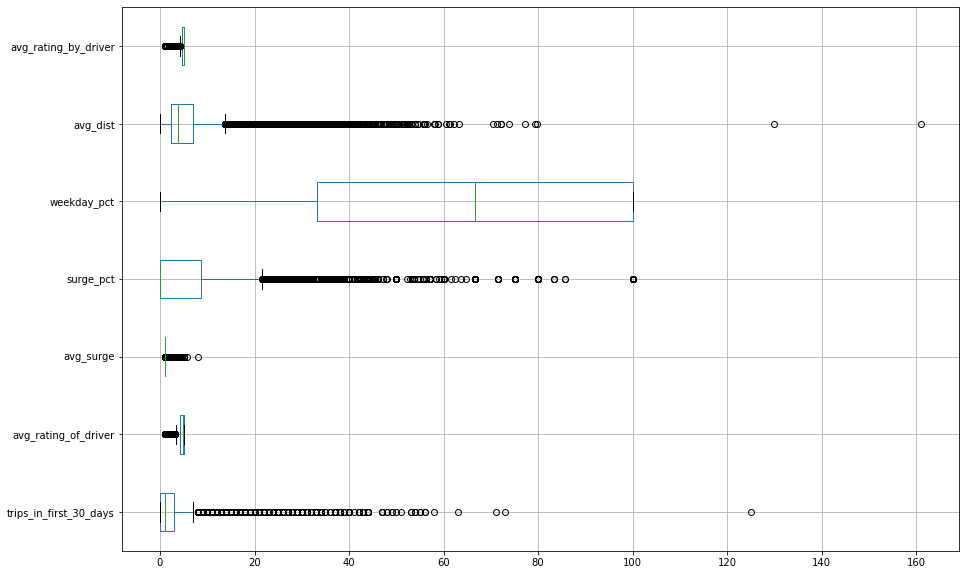

In [18]:
_ = plt.figure(figsize=(15,10))
_ = df.drop(columns=['ultimate_black_user']).boxplot(vert=False)

#### Check percentage of records above mean+1.96*std or less mean-1.96*std or above (less) than 95% quantile

In [21]:
def check_pct1(data, column):
    m1 = data[column].mean()
    sd1 = data[column].std()
    print("The outlier percenrage of column {}, is {}%".format(column,100*data[np.abs(data[column]-m1)>1.96*sd1].shape[0]/data.shape[0])) 

def check_pct2(data,column):
    q_low=data[column].quantile(0.025)
    q_high=data[column].quantile(0.975)
    print("The outlier percenrage of column {}, is {}%".format(column,data[(data[column]>=q_high) | (data[column]<=q_low)].shape[0]/data.shape[0])) 

    
columns = ['avg_rating_by_driver','avg_dist','weekday_pct','surge_pct','avg_surge','avg_rating_of_driver','trips_in_first_30_days']
print("By mean+(-)1.96sd")
for column in columns:
    check_pct1(df,column)

print("\n")
print("By 95% quantile")
for column in columns:
    check_pct2(df,column)

By mean+(-)1.96sd
The outlier percenrage of column avg_rating_by_driver, is 3.138%
The outlier percenrage of column avg_dist, is 4.89%
The outlier percenrage of column weekday_pct, is 0.0%
The outlier percenrage of column surge_pct, is 6.184%
The outlier percenrage of column avg_surge, is 3.074%
The outlier percenrage of column avg_rating_of_driver, is 3.994%
The outlier percenrage of column trips_in_first_30_days, is 4.242%


By 95% quantile
The outlier percenrage of column avg_rating_by_driver, is 0.5985%
The outlier percenrage of column avg_dist, is 0.05056%
The outlier percenrage of column weekday_pct, is 0.51724%
The outlier percenrage of column surge_pct, is 0.7165%
The outlier percenrage of column avg_surge, is 0.71408%
The outlier percenrage of column avg_rating_of_driver, is 0.4495%
The outlier percenrage of column trips_in_first_30_days, is 0.3328%


#### Winsorizing dataset, replace by above 97.5% with 97.%, below 2.5% with 2.5%

             city  trips_in_first_30_days signup_date  avg_rating_of_driver  \
0  King's Landing                   4.000  2014-01-25                   4.7   
1         Astapor                   0.000  2014-01-29                   5.0   
2         Astapor                   3.000  2014-01-06                   4.3   
3  King's Landing                   9.000  2014-01-10                   4.6   
4      Winterfell                  12.025  2014-01-27                   4.4   

   avg_surge last_trip_date    phone  surge_pct  ultimate_black_user  \
0       1.10     2014-06-17   iPhone       15.4                 True   
1       1.00     2014-05-05  Android        0.0                False   
2       1.00     2014-01-07   iPhone        0.0                False   
3       1.14     2014-06-29   iPhone       20.0                 True   
4       1.19     2014-03-15  Android       11.8                False   

   weekday_pct  avg_dist  avg_rating_by_driver  
0         46.2      3.67                   

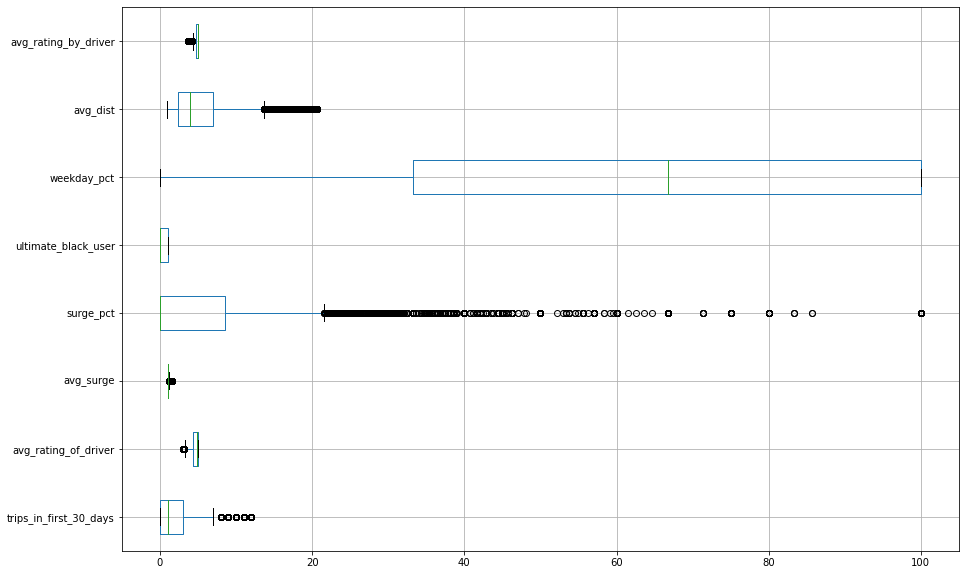

In [22]:
def df_replace(data, columns):
    data1 = data.copy()
    for column in columns:
        q_low=data1[column].quantile(0.025)
        q_high=data1[column].quantile(0.975)
        data1.loc[data1[column]>q_high,column] = q_high
        data1.loc[data1[column]<q_low,column] = q_low
    
    return data1

columns = ['avg_rating_by_driver','avg_dist','surge_pct','avg_surge','avg_rating_of_driver','trips_in_first_30_days']
df1 = df_replace(df,columns)
print(df1.head())

_ = plt.figure(figsize=(15,10))
_ = df1.boxplot(vert=False)

#### Replace missing variables "avg_rating_of_driver" and "avg_rating_by_driver" with median

In [23]:
df1['avg_rating_of_driver'].fillna(df1['avg_rating_of_driver'].median(),inplace=True)
df1['avg_rating_by_driver'].fillna(df1['avg_rating_by_driver'].median(),inplace=True)

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null float64
signup_date               50000 non-null datetime64[ns]
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null datetime64[ns]
phone                     49604 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(7), object(2)
memory usage: 4.2+ MB


#### Discrete Variables

In [25]:
print(df1.phone.value_counts(),"\n")
print(df1.ultimate_black_user.value_counts(),"\n")
print(df1.signup_date.value_counts().nlargest(5),"\n")
print(df1.city.value_counts(),"\n")

iPhone     34582
Android    15022
Name: phone, dtype: int64 

False    31146
True     18854
Name: ultimate_black_user, dtype: int64 

2014-01-18    2948
2014-01-25    2885
2014-01-11    2402
2014-01-24    2284
2014-01-17    2149
Name: signup_date, dtype: int64 

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64 



In [26]:
###Set missing of phone with "others"
df1.phone.fillna("others",inplace=True)

### EDA

In [27]:
df1['retained_status'] = df1['trips_in_first_30_days']>0
df1['retained_status'].replace([True,False],[1,0],inplace=True)

In [28]:
#for i in range(df1.shape[0]):
#    if df1['last_trip_date'][i].month-df1['signup_date'][i].month>=5 and df1['last_trip_date'][i].day-df1['signup_date'][i].day>=0:
#        df1.loc[i,'active_status']='active'
#    else:
#        df1.loc[i,'active_status']='non-active'
df1['active_status'] = df1['last_trip_date']-df1['signup_date']>datetime.timedelta(151)
df1['active_status'].replace([True,False],[1,0],inplace=True)

In [29]:
df1['active_status'].value_counts(normalize=True)*100

0    76.612
1    23.388
Name: active_status, dtype: float64

76.61% non active, 23.39% active

#### Pairplot of continuous variables

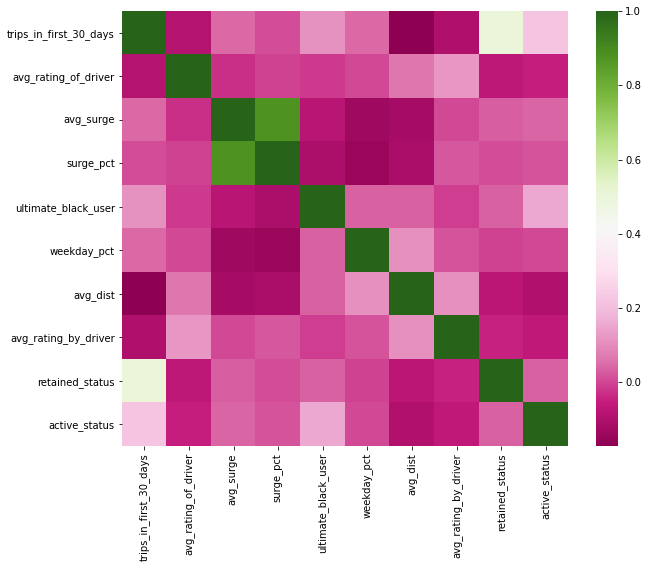

In [30]:
columns = ['trips_in_first_30_days','avg_rating_of_driver','avg_surge','surge_pct','weekday_pct','avg_dist','avg_rating_by_driver']
fig = plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(), cmap="PiYG")

Only high correlation between surge_pct and avg_surge, keep avg_surge

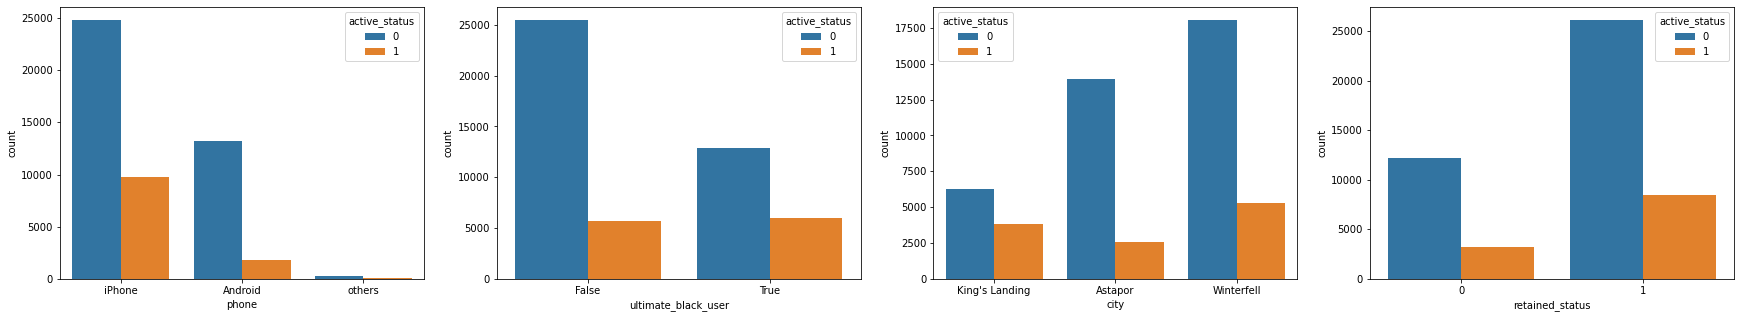

In [31]:
fig = plt.figure(figsize=(30,5))
ax1 = fig.add_subplot(141)
ax1 = sns.countplot(x='phone', data=df1, hue='active_status')
ax2 = fig.add_subplot(142)
ax2 = sns.countplot(x='ultimate_black_user', data=df1, hue='active_status')
ax3 = fig.add_subplot(143)
ax4 = sns.countplot(x='city', data=df1, hue='active_status')
ax3 = fig.add_subplot(144)
ax4 = sns.countplot(x='retained_status', data=df1, hue='active_status')
plt.show()

Check Difference for phone, ultimate_black_user, city, respectively. Do Chi square test

In [32]:
from scipy.stats import chi2_contingency
crosstab = pd.crosstab(df1['phone'], df1['active_status'])
results = chi2_contingency(crosstab)
print('phone,chi2 = {}\tp = {}'.format(results[0], results[1]))

crosstab = pd.crosstab(df1['ultimate_black_user'], df1['active_status'])
results = chi2_contingency(crosstab)
print('ultimate_black_user, chi2 = {}\tp = {}'.format(results[0], results[1]))

crosstab = pd.crosstab(df1['city'], df1['active_status'])
results = chi2_contingency(crosstab)
print('city, chi2 = {}\tp = {}'.format(results[0], results[1]))

crosstab = pd.crosstab(df1['retained_status'], df1['active_status'])
results = chi2_contingency(crosstab)
print('city, chi2 = {}\tp = {}'.format(results[0], results[1]))

phone,chi2 = 1509.3232774766009	p = 0.0
ultimate_black_user, chi2 = 1231.6474855613692	p = 8.08149362686509e-270
city, chi2 = 1756.6344990188718	p = 0.0
city, chi2 = 75.21758226794746	p = 4.215959794360126e-18


In [33]:
# Chi square significant for phone, ultimate_black_user, city
print(df1.groupby('phone')['active_status'].apply(lambda x: sum(x)/len(x)),"\n")
print(df1.groupby('ultimate_black_user')['active_status'].apply(lambda x: sum(x)/len(x)),"\n")
print(df1.groupby('city')['active_status'].apply(lambda x: sum(x)/len(x)),"\n")
print(df1.groupby('retained_status')['active_status'].apply(lambda x: sum(x)/len(x)),"\n")

phone
Android    0.122154
iPhone     0.282748
others     0.204545
Name: active_status, dtype: float64 

ultimate_black_user
False    0.182174
True     0.319296
Name: active_status, dtype: float64 

city
Astapor           0.155437
King's Landing    0.378480
Winterfell        0.226688
Name: active_status, dtype: float64 

retained_status
0    0.209227
1    0.244843
Name: active_status, dtype: float64 



Higher active driver with phone in iPhone or ultimate_black_userand, or city in King's Landing, or retained_status

In [34]:
from statsmodels.stats.weightstats import CompareMeans

def z_test(df, col, target='active_status'):
    t1 = df.loc[df[col]==1, target]
    t2 = df.loc[df[col]==0, target]
    print(t1.head())
    print(t2.head())
    z_data = CompareMeans.from_data(t1, t2)
    z, p = CompareMeans.ztest_ind(z_data)
    print('For {}, z = {}, p = {}'.format(col, z, p))
z_test(df1, 'ultimate_black_user')
z_test(df1,'retained_status')

0     0
3     1
5     0
10    0
15    0
Name: active_status, dtype: int64
1    0
2    0
4    0
6    0
7    0
Name: active_status, dtype: int64
For ultimate_black_user, z = 35.545837597899364, p = 9.63479655794232e-277
0    0
2    0
3    1
4    0
5    0
Name: active_status, dtype: int64
1     0
13    0
17    1
19    1
22    0
Name: active_status, dtype: int64
For retained_status, z = 8.69063431175043, p = 3.6042143104604815e-18


Mean difference between ultimate_black_user and active_status

### **2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model?**

#### Drop unuseful columns(features)

In [64]:
df1.head()
columns_drop = ['signup_date','last_trip_date','surge_pct']
df2 = df1.drop(columns=columns_drop)

In [65]:
df2.head()

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained_status,active_status
0,King's Landing,4.000,4.7,1.10,iPhone,True,46.2,3.67,5.0,1,0
1,Astapor,0.000,5.0,1.00,Android,False,50.0,8.26,5.0,0,0
2,Astapor,3.000,4.3,1.00,iPhone,False,100.0,0.92,5.0,1,0
3,King's Landing,9.000,4.6,1.14,iPhone,True,80.0,2.36,4.9,1,1
4,Winterfell,12.025,4.4,1.19,Android,False,82.4,3.13,4.9,1,0


In [66]:
### create dummy variables for city, phone, 
phone = pd.get_dummies(df2['phone'], drop_first=True)
df2= pd.concat([df2, phone], axis=1).drop('phone', axis=1)

city = pd.get_dummies(df2['city'], drop_first=True)
df2= pd.concat([df2, city], axis=1).drop('city', axis=1)
columns = df2.columns
X=df2[columns[:-1]]
y=df2[columns[-1]]

###

### Modeling 
 - stratify split data by y 
 - 80% train (5 folder cv, tune parameters), 20% test
 - 5 different models (Random Forest, KNN, Naive Bayes, Logistic Regression, AdaBoost)
 - Metric: Accuracy, Precision

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

Model (1) Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc,roc_auc_score,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [70]:
scaler = MinMaxScaler()
#scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
clf = RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=5)
# use 5 folder stratified CV to tune number of trees
params = {'n_estimators':[100,200,400],
         'criterion':['gini'],
          'max_features':['log2'],
          'max_depth':[4,6],
          'min_samples_split':[2,4],
          'min_samples_leaf':[2,3]}
model = GridSearchCV(clf, params, cv=5,scoring='precision')
model.fit(X_train, y_train)
print('Best parameters were', model.best_params_)
print('Best average precision was', model.best_score_)

Best parameters were {'criterion': 'gini', 'max_depth': 6, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100}
Best average precision was 0.5892816580239832


In [79]:
model = RandomForestClassifier(
    random_state=42, class_weight='balanced', n_estimators=100,
    criterion='gini',max_features='log2',max_depth=6,
    min_samples_split=2,min_samples_leaf=3
)
model.fit(X_train, y_train)
X_test = scaler.fit_transform(X_test)
y_pred = model.predict(X_test)
print('Accuracy of test set was', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy of test set was 0.6716
              precision    recall  f1-score   support

           0       0.98      0.39      0.56      5333
           1       0.59      0.99      0.74      4667

    accuracy                           0.67     10000
   macro avg       0.78      0.69      0.65     10000
weighted avg       0.80      0.67      0.64     10000



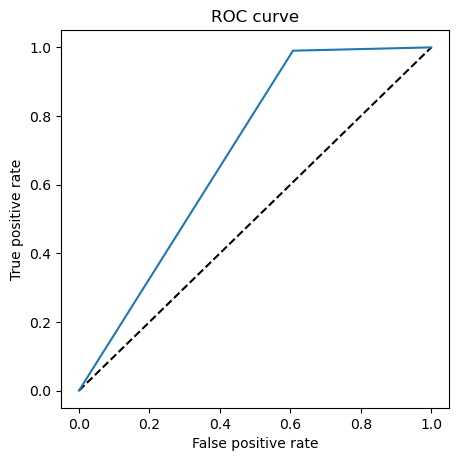

In [73]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr_rf, tpr_rf)


plt.figure(figsize=(5,5),dpi=100)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF') 
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

plt.show()

Model (2) Naive Bayes - No tunining paramters

Accuracy of test set was 0.6662
              precision    recall  f1-score   support

           0       0.89      0.43      0.58      5333
           1       0.59      0.94      0.72      4667

    accuracy                           0.67     10000
   macro avg       0.74      0.68      0.65     10000
weighted avg       0.75      0.67      0.65     10000



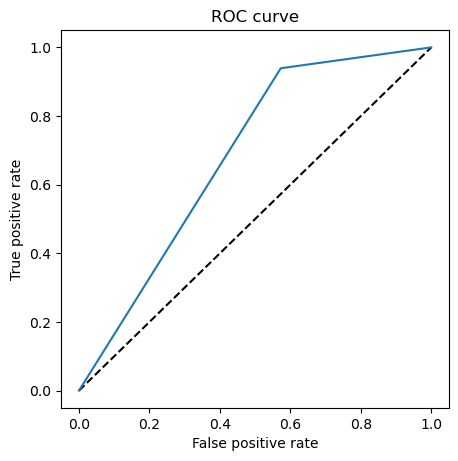

In [80]:
from sklearn.naive_bayes import MultinomialNB

# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(X_train, y_train)

# Create the predicted tags: pred
y_pred = nb_classifier.predict(X_test)
print('Accuracy of test set was', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

##plot ROC 
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr_rf, tpr_rf)


plt.figure(figsize=(5,5),dpi=100)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='NB') 
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

plt.show()

Model (3) K-Nearest Neighbor

In [81]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_jobs=5)
params = {'n_neighbors':[5,7,9,11,13,15],
         'weights':['uniform', 'distance'],
         'p':[1,2],
         'metric':['euclidean','manhattan']}
model = GridSearchCV(knn, params, cv=5,scoring='precision')
model.fit(X_train, y_train)
print('Best parameters were', model.best_params_)
print('Best average precision was', model.best_score_)

Best parameters were {'metric': 'euclidean', 'n_neighbors': 15, 'p': 1, 'weights': 'distance'}
Best average precision was 0.6295980967083631


Accuracy of test set was 0.6596
              precision    recall  f1-score   support

           0       0.70      0.63      0.66      5333
           1       0.62      0.69      0.65      4667

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.66     10000
weighted avg       0.66      0.66      0.66     10000



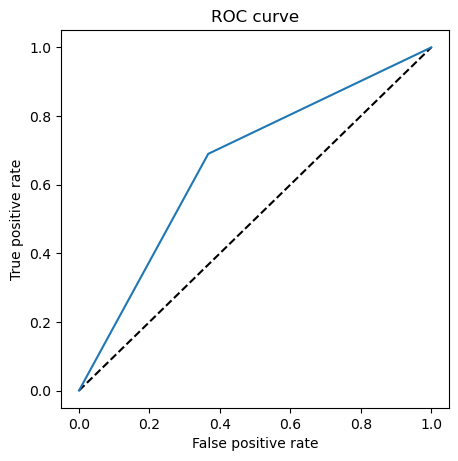

In [98]:
model = KNeighborsClassifier(
    n_neighbors=15,weights='distance',p=1,metric='euclidean'
)
model.fit(X_train, y_train)
y_pred =  model.predict(X_test)
print('Accuracy of test set was', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

##plot ROC 
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr_rf, tpr_rf)


plt.figure(figsize=(5,5),dpi=100)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='NB') 
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

plt.show()

Model (4) Loistic Regression

In [94]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression(class_weight='balanced')
params = {'C':[0.001,0.01,0.1,1,10,100],
         'solver':['newton-cg', 'lbfgs', 'sag', 'saga'],
         'penalty':['l2'],
         'max_iter':[20000]}
model = GridSearchCV(lg, params, cv=5,scoring='precision')

model.fit(X_train, y_train)
print('Best parameters were', model.best_params_)
print('Best average precision was', model.best_score_)

Best parameters were {'C': 100, 'max_iter': 20000, 'penalty': 'l2', 'solver': 'lbfgs'}
Best average precision was 0.5994220192601181


Accuracy of test set was 0.6763
              precision    recall  f1-score   support

           0       0.86      0.47      0.61      5333
           1       0.60      0.91      0.72      4667

    accuracy                           0.68     10000
   macro avg       0.73      0.69      0.67     10000
weighted avg       0.74      0.68      0.66     10000



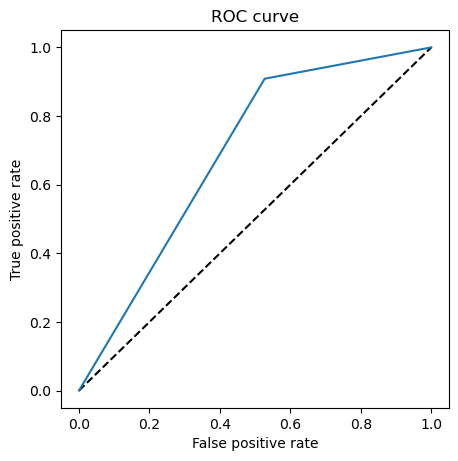

In [95]:
model = LogisticRegression(C=100,solver='lbfgs',penalty='l2', max_iter=20000 ,class_weight='balanced')

model.fit(X_train, y_train)
y_pred =  model.predict(X_test)
print('Accuracy of test set was', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

##plot ROC 
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr_rf, tpr_rf)


plt.figure(figsize=(5,5),dpi=100)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='NB') 
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

plt.show()

Model (5) AdaBoost

In [117]:
from sklearn.ensemble import AdaBoostClassifier

#score = scorer
params = {'n_estimators':range(20,91,10),
         'learning_rate':[0.5,0.75,1]}
         #'base_estimator':[LogisticRegression()]}
         #'base_estimator':[RandomForestClassifier()]}
model = AdaBoostClassifier(random_state=42)

clf = GridSearchCV(estimator=model, param_grid=params, cv=5,scoring='precision')
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print(clf.best_params_, '\n')
print("Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))

print('Best parameters were', clf.best_params_)
print('Best average precision was', clf.best_score_)

Best parameters set found on development set:
{'learning_rate': 1, 'n_estimators': 80} 

Grid scores on development set:
0.606 (+/-0.008) for {'learning_rate': 0.5, 'n_estimators': 20}
0.609 (+/-0.009) for {'learning_rate': 0.5, 'n_estimators': 30}
0.613 (+/-0.010) for {'learning_rate': 0.5, 'n_estimators': 40}
0.615 (+/-0.010) for {'learning_rate': 0.5, 'n_estimators': 50}
0.617 (+/-0.010) for {'learning_rate': 0.5, 'n_estimators': 60}
0.619 (+/-0.010) for {'learning_rate': 0.5, 'n_estimators': 70}
0.619 (+/-0.011) for {'learning_rate': 0.5, 'n_estimators': 80}
0.619 (+/-0.011) for {'learning_rate': 0.5, 'n_estimators': 90}
0.612 (+/-0.014) for {'learning_rate': 0.75, 'n_estimators': 20}
0.617 (+/-0.011) for {'learning_rate': 0.75, 'n_estimators': 30}
0.618 (+/-0.011) for {'learning_rate': 0.75, 'n_estimators': 40}
0.620 (+/-0.013) for {'learning_rate': 0.75, 'n_estimators': 50}
0.621 (+/-0.013) for {'learning_rate': 0.75, 'n_estimators': 60}
0.621 (+/-0.012) for {'learning_rate': 0.7

Accuracy of test set was 0.6761
              precision    recall  f1-score   support

           0       0.78      0.54      0.64      5333
           1       0.61      0.83      0.70      4667

    accuracy                           0.68     10000
   macro avg       0.70      0.69      0.67     10000
weighted avg       0.70      0.68      0.67     10000



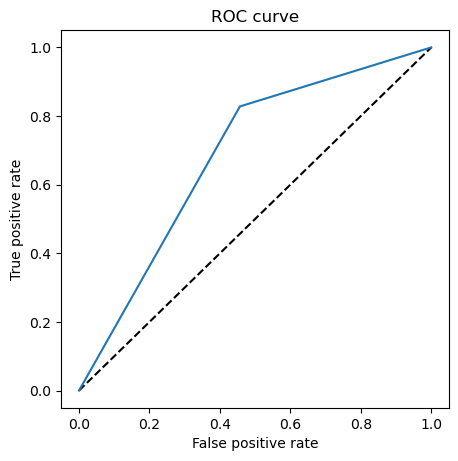

In [108]:
clf = AdaBoostClassifier(
   learning_rate=1, n_estimators = 80
)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy of test set was', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

##plot ROC 
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr_rf, tpr_rf)


plt.figure(figsize=(5,5),dpi=100)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='NB') 
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

plt.show()

### Summary of Model (1)-(5)

| # Model |  Model  | Train Precision (after 5 cv) | Accuracy (Test) | Precision (Test) |
| --- | --- | --- | --- | --- |
| 1 |   Random Forest     |  0.5893  |  0.6716  |  0.59  |
| 2 |   Naive Bayes       |     -    |  0.6662  |  0.59  |
| 3 | K Nearest Neighbor  |  0.6296  |  0.6596  |  0.62  |
| 4 | Logistic Regression |  0.5994  |  0.6763  |  0.60  |
| 5 | **AdaBoost**        |**0.6227**|**0.6886**|**0.63**|



### From above table: we choose AdaBoost because it has highest accuracy and precision for test
### Valid of Model:
- Train Data (Precision): 0.6227
- Test Data (Accuracy): 0.6886
- Test Data (Precision): 0.60

### Plot Feature Importance

avg_dist                  33.75
avg_rating_by_driver      18.75
trips_in_first_30_days    12.50
avg_surge                 10.00
weekday_pct                8.75
avg_rating_of_driver       7.50
active_status              2.50
ultimate_black_user        2.50
King's Landing             1.25
others                     1.25
iPhone                     1.25
retained_status            0.00
dtype: float64


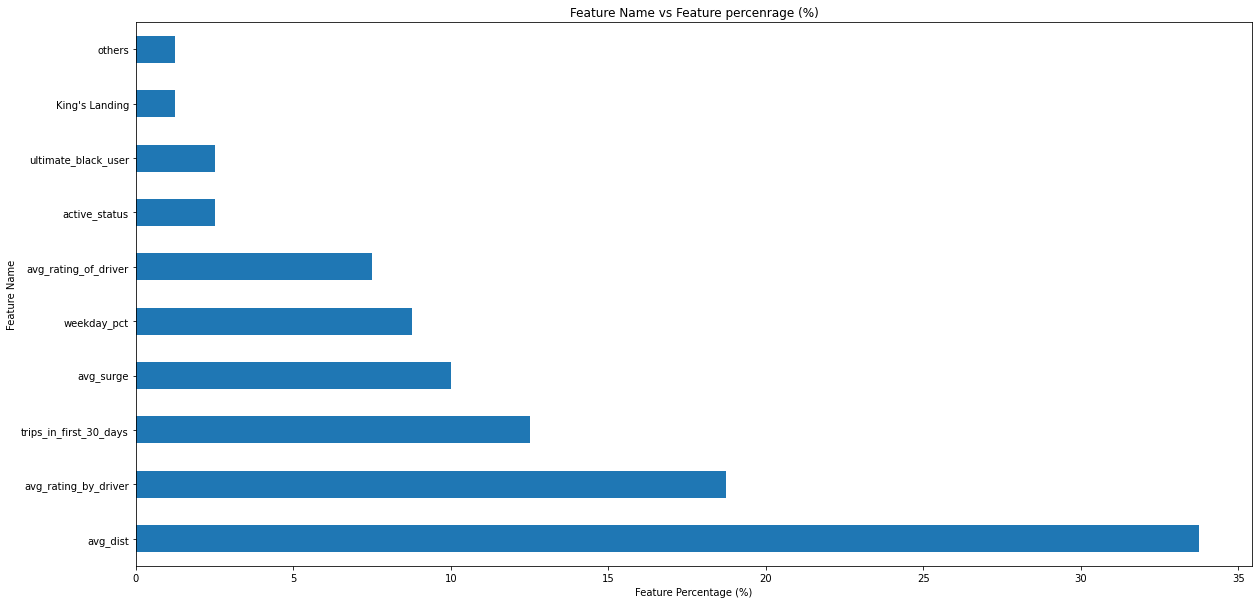

In [96]:
feat_imp = pd.Series(clf.feature_importances_, index=X.columns)
feat_imp = 100*feat_imp.sort_values(ascending=False)
print(feat_imp)
fig = plt.figure(figsize=(20,10))
indices = np.argsort(feat_imp)
_ = feat_imp.nlargest(10).plot(kind='barh')

_ = plt.xlabel('Feature Percentage (%)')
_ = plt.ylabel('Feature Name')
_ = plt.title('Feature Name vs Feature percenrage (%)')

### Key indicators of model performance (%):
- avg_dist                  33.75
- avg_rating_by_driver      18.75
- trips_in_first_30_days    12.50
- avg_surge                 10.00
- weekday_pct                8.75
- avg_rating_of_driver       7.50

#### Check Coefficient From Logistic Regression

In [122]:
model = LogisticRegression(C=100,solver='lbfgs',penalty='l2', max_iter=20000 ,class_weight='balanced')

model.fit(X_train, y_train)
#print(coefs)
pd.DataFrame(zip(list(df2.columns),model.coef_[0]),columns = ["Feature","Coefficient"])

,Feature,Coefficient
0,trips_in_first_30_days,0.583627
1,avg_rating_of_driver,-0.490443
2,avg_surge,-0.568067
3,ultimate_black_user,-0.328109
4,weekday_pct,-0.115840
5,avg_dist,0.817674
6,avg_rating_by_driver,-0.632597
7,retained_status,0.068266
8,active_status,0.478471
9,iPhone,-0.035320


### **Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long-term rider retention (again, a few sentences will suffice).**

In [130]:
print(df2.groupby('active_status')['avg_dist'].mean())
print(df2.groupby('active_status')['avg_rating_by_driver'].mean())
print(df2.groupby('active_status')['avg_rating_of_driver'].mean())
print(df2.groupby('active_status')['trips_in_first_30_days'].mean())
print(df2.groupby('active_status')['avg_surge'].mean())
print(df2.groupby('active_status')['weekday_pct'].mean())

active_status
0    5.847561
1    4.785076
Name: avg_dist, dtype: float64
active_status
0    4.815029
1    4.767180
Name: avg_rating_by_driver, dtype: float64
active_status
0    4.680698
1    4.620643
Name: avg_rating_of_driver, dtype: float64
active_status
0    1.755540
1    3.192109
Name: trips_in_first_30_days, dtype: float64
active_status
0    1.058191
1    1.071544
Name: avg_surge, dtype: float64
active_status
0    60.832601
1    61.232307
Name: weekday_pct, dtype: float64


### Imporve long-term rider retention (Combine with coefficient from Logistic Regression and feature importance from AdaBoost): 
- ####  avg_dist has a positive effect on active status, so we encourage drivers to increase the average distance in miles per trip taken in the first 30 days after signup by give them discount on toll cost in first 30 days signup.
- #### avg_rating_by_driver and avg_rating_of driver have negative effects on active status, so we discourage or stop rider's rating over (or of their drivers) all of their trips.
- #### trips_in_first_30_days has a positive effect on active status, so we use the same way as avg_dist.
- #### avg_surge has a negative effect on active status, so we encourage drivers to take trips on different time periods (give them more benefits for the specific periods with less drivers).
- #### weekday_pct has a negative effect on active status, we encourage drivers to increase trips on the weekend and give them more reimbursement.